---

# simple SVM

### Content

+ [1. Notebook description](#1.-Notebook-Description)
+ [2. Load and Select](#2.-Load-And-Select)
+ [3. Grid Search](#3.-Grid-Search)
+ [4. Plots](#3.-Plots)

---

# 1. Notebook Description

Run a single SVM for two arbitrary labels ([1,8]) and some time window.
This notebook is mainly used to construct plots for my thesis. No actual results are generated this way.


---

**Imports:**

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [2]:
# digits related code
from digits.data import matimport
from digits.data import select
from digits.metrics.cfm import Confusion, ConfusionGrid
from digits.metrics import scores
from digits.inspect.plot import normhist
from digits.transform.dimreduction import AverageTransform, SubsampleTransform

# system libraries
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/lib/python3/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  

# 2. Load and Select

In [3]:
imp = matimport.Importer(dataroot='../../../data/thomas/artcorr/')
imp.open('3130.h5')

In [4]:
samples = imp.store.samples
targets = imp.store.targets
samples.shape

(7204, 89664)

In [5]:
#samples, targets = select.fromsessionlist(samples, targets, ['14','15','16'])
samples, targets = select.fromsessionblacklist(samples, targets, ['01'])
samples = select.fromchannelblacklist(samples, ['RHEOG', 'LHEOG', 'IOL'])
samples, targets = select.fromtargetlist(samples, targets, [1, 8])
samples = select.fromtimerange(samples, 't_0200', 't_0600')
samples, targets = AverageTransform(average=3, verbose=True).transform(samples, targets)
samples = SubsampleTransform(width=5, verbose=True).transform(samples)

running SubsampleTransform for sample 445/445[target 8]

In [6]:
samples.shape

(445, 4941)

In [7]:
#mmscaler = MinMaxScaler(feature_range=(-1,1))
#split = train_test_split(mmscaler.fit_transform(samples.values),
split = train_test_split(samples.values,
                         targets.values.flatten(),
                         test_size=0.2,
                         stratify=targets.values.flatten())
X_train, X_test, y_train, y_test = split

[-20.39038449 -19.98126789 -19.57215129 -19.16303469 -18.75391809
 -18.34480149 -17.93568489 -17.52656829 -17.11745169 -16.70833509
 -16.29921849 -15.89010189 -15.48098529 -15.07186869 -14.66275209
 -14.25363549 -13.84451889 -13.43540229 -13.02628569 -12.61716909
 -12.2080525  -11.7989359  -11.3898193  -10.9807027  -10.5715861
 -10.1624695   -9.7533529   -9.3442363   -8.9351197   -8.5260031
  -8.1168865   -7.7077699   -7.2986533   -6.8895367   -6.4804201
  -6.0713035   -5.6621869   -5.2530703   -4.8439537   -4.4348371
  -4.0257205   -3.6166039   -3.2074873   -2.7983707   -2.3892541
  -1.9801375   -1.5710209   -1.1619043   -0.7527877   -0.3436711
   0.0654455    0.4745621    0.8836787    1.2927953    1.7019119
   2.1110285    2.5201451    2.9292617    3.3383783    3.7474949
   4.1566115    4.5657281    4.9748447    5.3839613    5.7930779
   6.2021945    6.6113111    7.0204277    7.4295443    7.8386609
   8.2477775    8.6568941    9.06601069   9.47512729   9.88424389
  10.29336049  10.70

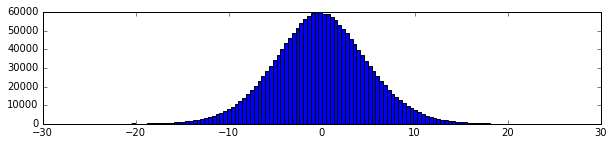

In [8]:
normhist(X_train)


# 3. Grid Search

In [9]:
params = [
    {
      'kernel': ['linear'],
      'C': np.logspace(-8,2,20),
    }
]
grid = GridSearchCV(SVC(), params, n_jobs=32, verbose=1, cv=10)
_ = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:   10.8s
[Parallel(n_jobs=32)]: Done 200 out of 200 | elapsed:   15.0s finished


# 4. Plots

[ 0.5         0.50505051  0.51010101  0.51515152  0.52020202  0.52525253
  0.53030303  0.53535354  0.54040404  0.54545455  0.55050505  0.55555556
  0.56060606  0.56565657  0.57070707  0.57575758  0.58080808  0.58585859
  0.59090909  0.5959596   0.6010101   0.60606061  0.61111111  0.61616162
  0.62121212  0.62626263  0.63131313  0.63636364  0.64141414  0.64646465
  0.65151515  0.65656566  0.66161616  0.66666667  0.67171717  0.67676768
  0.68181818  0.68686869  0.69191919  0.6969697   0.7020202   0.70707071
  0.71212121  0.71717172  0.72222222  0.72727273  0.73232323  0.73737374
  0.74242424  0.74747475  0.75252525  0.75757576  0.76262626  0.76767677
  0.77272727  0.77777778  0.78282828  0.78787879  0.79292929  0.7979798
  0.8030303   0.80808081  0.81313131  0.81818182  0.82323232  0.82828283
  0.83333333  0.83838384  0.84343434  0.84848485  0.85353535  0.85858586
  0.86363636  0.86868687  0.87373737  0.87878788  0.88383838  0.88888889
  0.89393939  0.8989899   0.9040404   0.90909091  0.

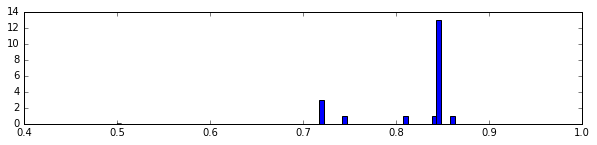

In [10]:
normhist([x[1] for x in grid.grid_scores_], left=0.5, right=1.0)
#plt.savefig('out/SVM_linear_single_avg_sub_gridhist_3130.png')
#np.save('SVM_linear_single_avg_3130.npy', grid)

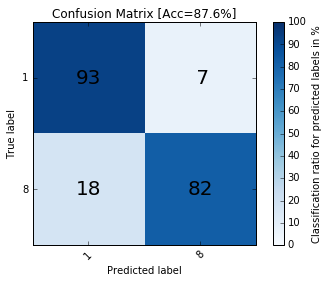

In [11]:
Confusion(grid, X_test, y_test).plot()
#Confusion(grid, X_test, y_test).plot(save_file='out/SVM_linear_single_avg_sub_3130.png')

---